In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [215]:
# 1. Membaca dataset
print("1. Membaca Dataset")
df = pd.read_csv('Bank Customer Churn Prediction Cleaned.csv')
df

1. Membaca Dataset


customer_id  credit_score country  gender  age  tenure    balance  \
0        15647311           608   Spain  Female   41       1   83807.86   
1        15701354           699  France  Female   39       1       0.00   
2        15737888           850   Spain  Female   43       2  125510.82   
3        15592531           822  France    Male   50       7       0.00   
4        15792365           501  France    Male   44       4  142051.07   
...           ...           ...     ...     ...  ...     ...        ...   
7672     15569266           644  France    Male   28       7  155060.41   
7673     15719294           800  France  Female   29       2       0.00   
7674     15606229           771  France    Male   39       5       0.00   
7675     15569892           516  France    Male   35      10   57369.61   
7676     15628319           792  France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            0              1         112542.58      0  
1                   2            0              0          93826.63      0  
2                   1            1              1          79084.10      0  
3                   2            1              1          10062.80      0  
4                   2            0              1          74940.50      0  
...               ...          ...            ...               ...    ...  
7672                1            1              0          29179.52      0  
7673                2            0              0         167773.55      0  
7674                2            1              0          96270.64      0  
7675                1            1              1         101699.77      0  
7676                1            1              0          38190.78      0  

[7677 rows x 12 columns]

In [216]:
print("Jumlah data awal:", len(df))
print("\nInfo dataset awal:")
print(df.info())
print("\nSampel data awal:")
print(df.head())

Jumlah data awal: 7677

Info dataset awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7677 entries, 0 to 7676
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7677 non-null   int64  
 1   credit_score      7677 non-null   int64  
 2   country           7677 non-null   object 
 3   gender            7677 non-null   object 
 4   age               7677 non-null   int64  
 5   tenure            7677 non-null   int64  
 6   balance           7677 non-null   float64
 7   products_number   7677 non-null   int64  
 8   credit_card       7677 non-null   int64  
 9   active_member     7677 non-null   int64  
 10  estimated_salary  7677 non-null   float64
 11  churn             7677 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 719.8+ KB
None

Sampel data awal:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15647311           608   S

In [217]:
# 2. Data Pre-processing
print("\n2. Pengecekan Data Duplikat")
duplicates = df.duplicated().sum()
print("Jumlah data duplikat:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("Data duplikat telah dihapus")
    print("Jumlah data setelah menghapus duplikat:", len(df))

print("\n3. Pengecekan Missing Values")
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

# Menghapus missing values jika ada
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Missing values telah dihapus")
    print("Jumlah data setelah menghapus missing values:", len(df))

# Deteksi dan penanganan Outliers menggunakan IQR method
print("\n4. Deteksi dan Penanganan Outliers")
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']


2. Pengecekan Data Duplikat
Jumlah data duplikat: 0

3. Pengecekan Missing Values
Jumlah missing values per kolom:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

4. Deteksi dan Penanganan Outliers


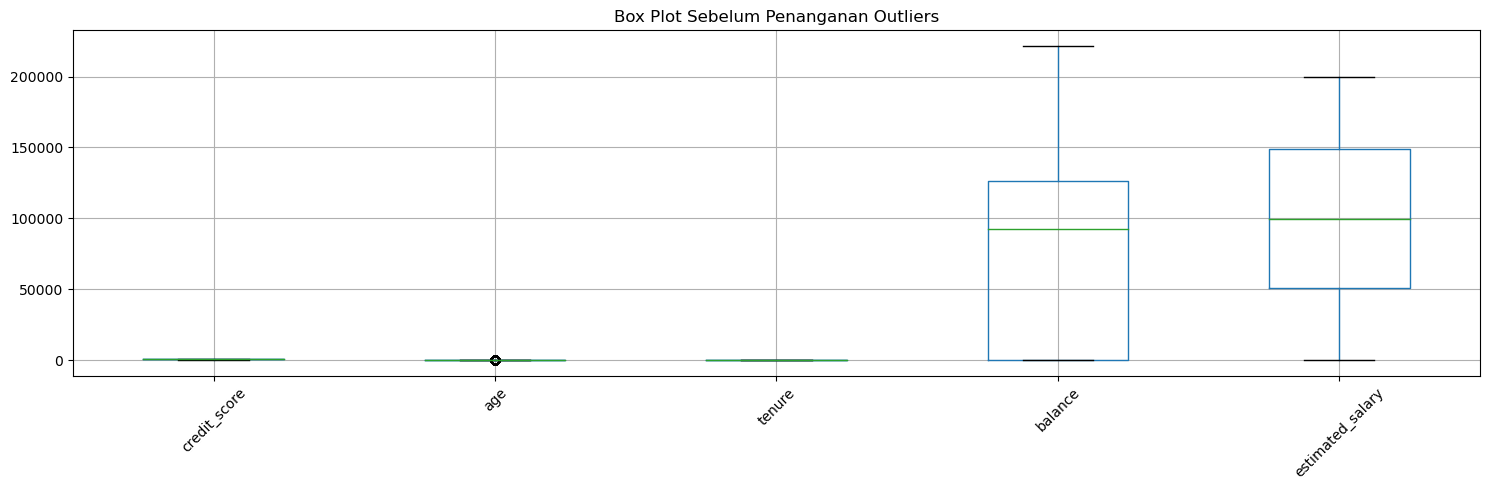

In [218]:
# Membuat plot box sebelum penanganan outliers
plt.figure(figsize=(15, 5))
plt.title("Box Plot Sebelum Penanganan Outliers")
df.boxplot(column=numerical_cols)
plt.xticks(rotation=45)
plt.tight_layout()

In [219]:
plt.savefig('boxplot_before.png')
plt.close()

In [220]:
# Fungsi untuk mendeteksi outliers
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Menghapus outliers
df_no_outliers = remove_outliers(df, numerical_cols)
print("Jumlah data setelah menghapus outliers:", len(df_no_outliers))

Jumlah data setelah menghapus outliers: 7477


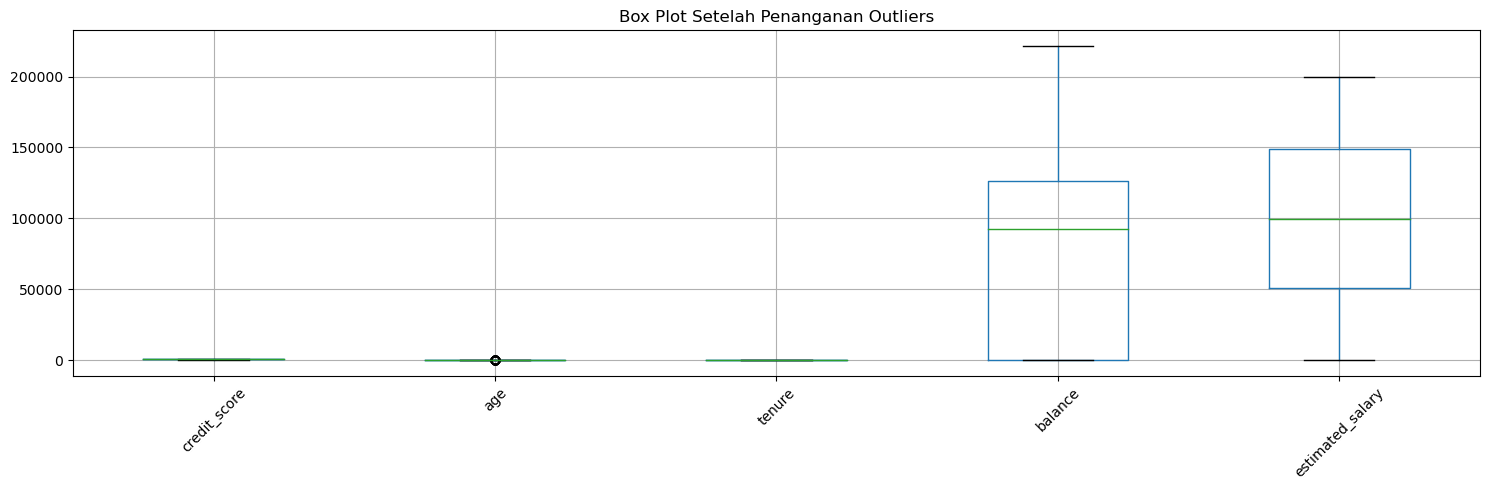

In [221]:
# Plot box setelah penanganan outliers
plt.figure(figsize=(15, 5))
plt.title("Box Plot Setelah Penanganan Outliers")
df_no_outliers.boxplot(column=numerical_cols)
plt.xticks(rotation=45)
plt.tight_layout()

In [222]:
plt.savefig('boxplot_after.png')
plt.close()

In [223]:
# 3. Encoding Data Kategorikal
print("\n5. Encoding Data Kategorikal")
le = LabelEncoder()
df_no_outliers['gender'] = le.fit_transform(df_no_outliers['gender'])
df_no_outliers['country'] = le.fit_transform(df_no_outliers['country'])


5. Encoding Data Kategorikal


In [224]:
# 4. Standardisasi Data Numerik
print("\n6. Standardisasi Data")
scaler = StandardScaler()
df_no_outliers[numerical_cols] = scaler.fit_transform(df_no_outliers[numerical_cols])


6. Standardisasi Data


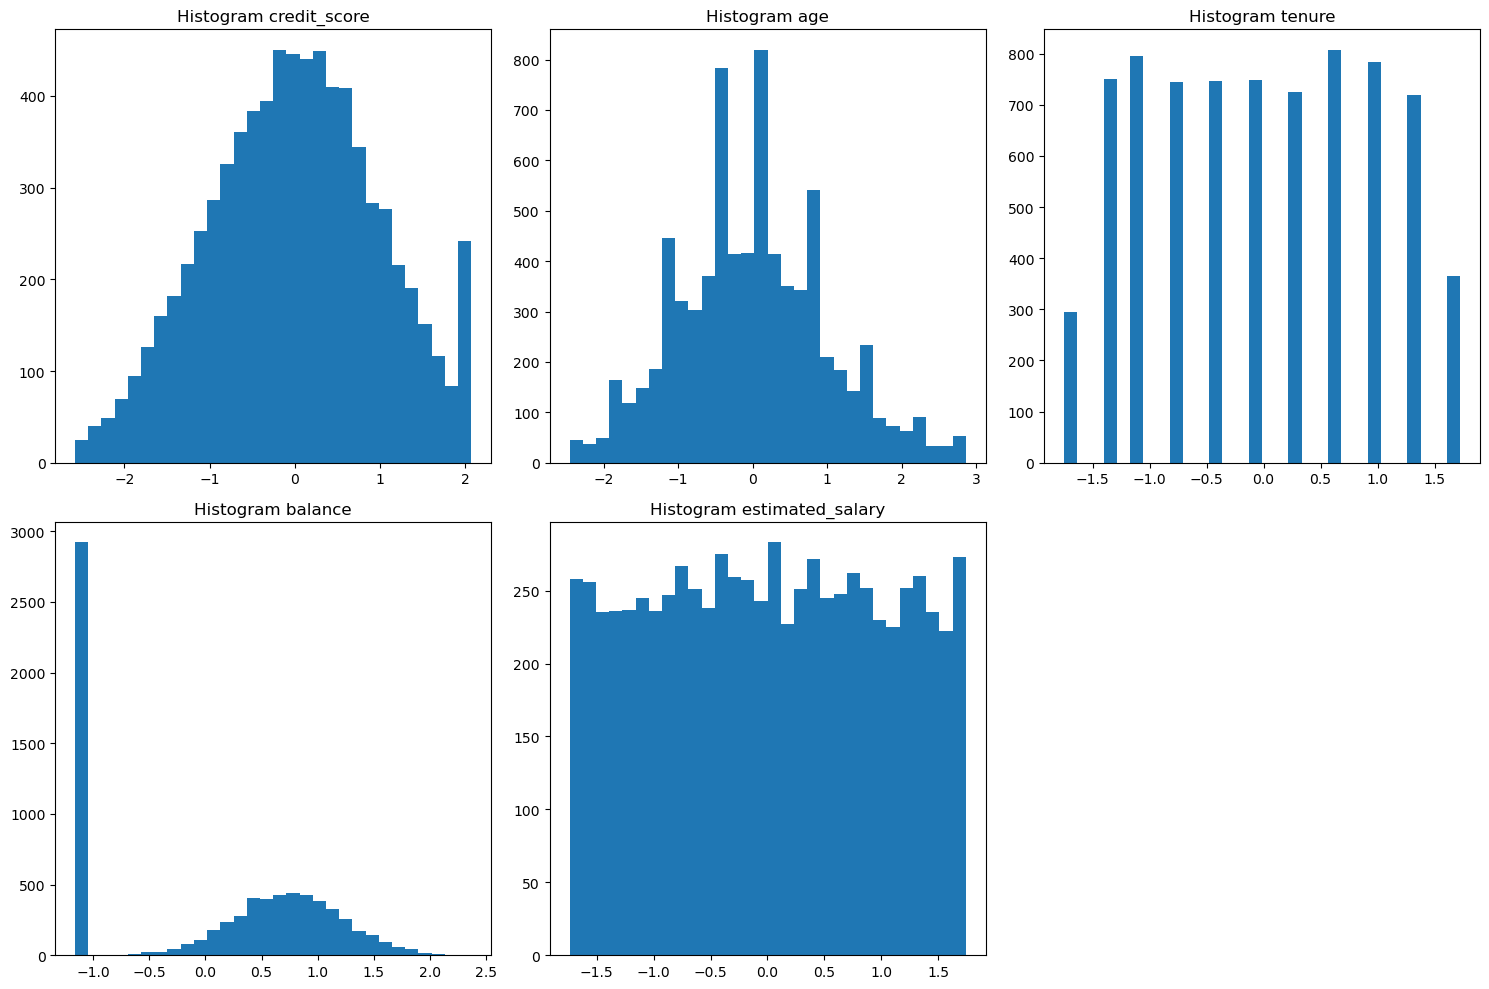

In [225]:
# Membuat histogram untuk visualisasi distribusi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_no_outliers[col], bins=30)
    plt.title(f'Histogram {col}')
plt.tight_layout()

In [226]:
plt.savefig('histograms.png')
plt.close()

In [227]:
# 5. Perbandingan data sebelum dan sesudah preprocessing
print("\n7. Perbandingan Data")
print("Jumlah data awal:", len(df))
print("Jumlah data setelah preprocessing:", len(df_no_outliers))
print("\nPerbandingan statistik deskriptif untuk kolom numerik:")
print("\nSebelum preprocessing:")
print(df[numerical_cols].describe())
print("\nSetelah preprocessing:")
print(df_no_outliers[numerical_cols].describe())


7. Perbandingan Data
Jumlah data awal: 7677
Jumlah data setelah preprocessing: 7477

Perbandingan statistik deskriptif untuk kolom numerik:

Sebelum preprocessing:
       credit_score          age       tenure        balance  estimated_salary
count   7677.000000  7677.000000  7677.000000    7677.000000       7677.000000
mean     651.532500    36.193826     5.035561   72870.208446      99848.972807
std       95.681256     8.013258     2.876186   62838.720574      57393.876561
min      405.000000    18.000000     0.000000       0.000000         90.070000
25%      584.000000    31.000000     3.000000       0.000000      50906.650000
50%      653.000000    36.000000     5.000000   92224.560000      99800.870000
75%      717.000000    41.000000     7.000000  126473.990000     148727.420000
max      850.000000    62.000000    10.000000  221532.800000     199992.480000

Setelah preprocessing:
       credit_score           age        tenure       balance  \
count  7.477000e+03  7.477000e+03  

In [228]:
# 6. Menyimpan hasil preprocessing
print("\n8. Menyimpan hasil preprocessing")
df_no_outliers.to_csv('Bank Customer Churn Prediction Pre-Processed.csv', index=False)
print("Data telah disimpan dalam file 'Bank Customer Churn Prediction Pre-Processed.csv'")


8. Menyimpan hasil preprocessing
Data telah disimpan dalam file 'Bank Customer Churn Prediction Pre-Processed.csv'


In [229]:
# Membaca dataset yang sudah di-preprocessing
df = pd.read_csv('Bank Customer Churn Prediction Pre-Processed.csv')

# Memilih fitur untuk clustering
# Tidak menggunakan customer_id dan churn karena tidak relevan untuk clustering
features_for_clustering = ['credit_score', 'country', 'gender', 'age', 'tenure', 
                         'balance', 'products_number', 'credit_card', 
                         'active_member', 'estimated_salary']

X = df[features_for_clustering]

In [230]:
# Elbow Method untuk menentukan jumlah cluster optimal
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    # Membuat dan melatih model K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Menyimpan inertia untuk Elbow Method
    inertias.append(kmeans.inertia_)
    
    # Menghitung Silhouette Score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

Text(0.5, 1.0, 'Elbow Method untuk Penentuan Jumlah Cluster Optimal')

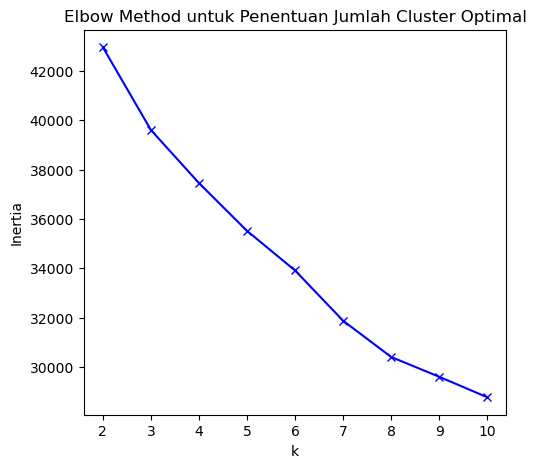

In [231]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Penentuan Jumlah Cluster Optimal')

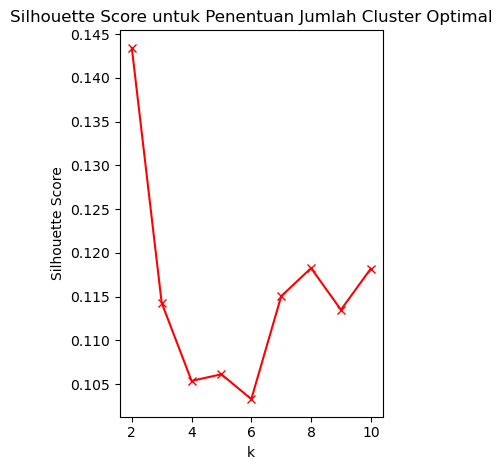

In [232]:
# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Penentuan Jumlah Cluster Optimal')
plt.tight_layout()

In [233]:
plt.savefig('cluster_optimization.png')
plt.close()

In [234]:
# Memilih jumlah cluster optimal (misalnya k=4, tapi ini bisa disesuaikan berdasarkan hasil analisis)
optimal_k = 8
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = final_kmeans.fit_predict(X)

# Menambahkan label cluster ke dataset
df['Cluster'] = cluster_labels

In [235]:
# Analisis karakteristik setiap cluster
print("\nKarakteristik setiap cluster:")
cluster_stats = df.groupby('Cluster').mean()
print(cluster_stats)


Karakteristik setiap cluster:
          customer_id  credit_score   country    gender       age    tenure  \
Cluster                                                                       
0        1.569393e+07     -0.778263  0.693856  0.582627 -0.310156 -0.825929   
1        1.569267e+07      0.918594  0.726547  0.566866 -0.076786 -0.865667   
2        1.568915e+07     -0.167811  0.006135  0.567485 -0.115756  0.070444   
3        1.569080e+07     -0.143766  0.847411  0.577657  1.710199  0.172820   
4        1.569072e+07      0.408203  0.822961  0.587983 -0.178006  0.893446   
5        1.568591e+07     -0.407457  0.763674  0.586171 -0.444861  0.628810   
6        1.569170e+07      0.119453  0.005241  0.548218 -0.108436 -0.052077   
7        1.569312e+07     -0.016271  1.998963  0.562241 -0.074616  0.061208   

          balance  products_number  credit_card  active_member  \
Cluster                                                          
0        0.766543         1.345339     0.69173

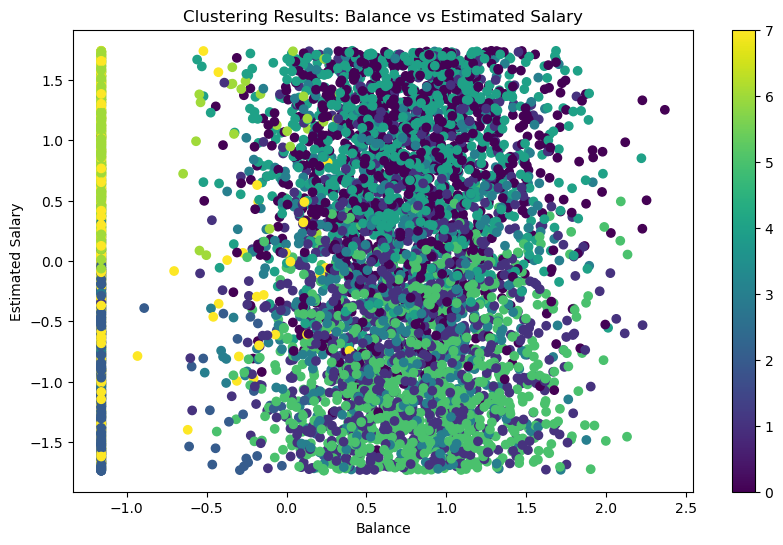

In [236]:
# Visualisasi hasil clustering
# 1. Scatter plot untuk dua fitur penting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['balance'], df['estimated_salary'], 
                     c=df['Cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.title('Clustering Results: Balance vs Estimated Salary')
plt.colorbar(scatter)

In [237]:
plt.savefig('cluster_scatter.png')
plt.close()

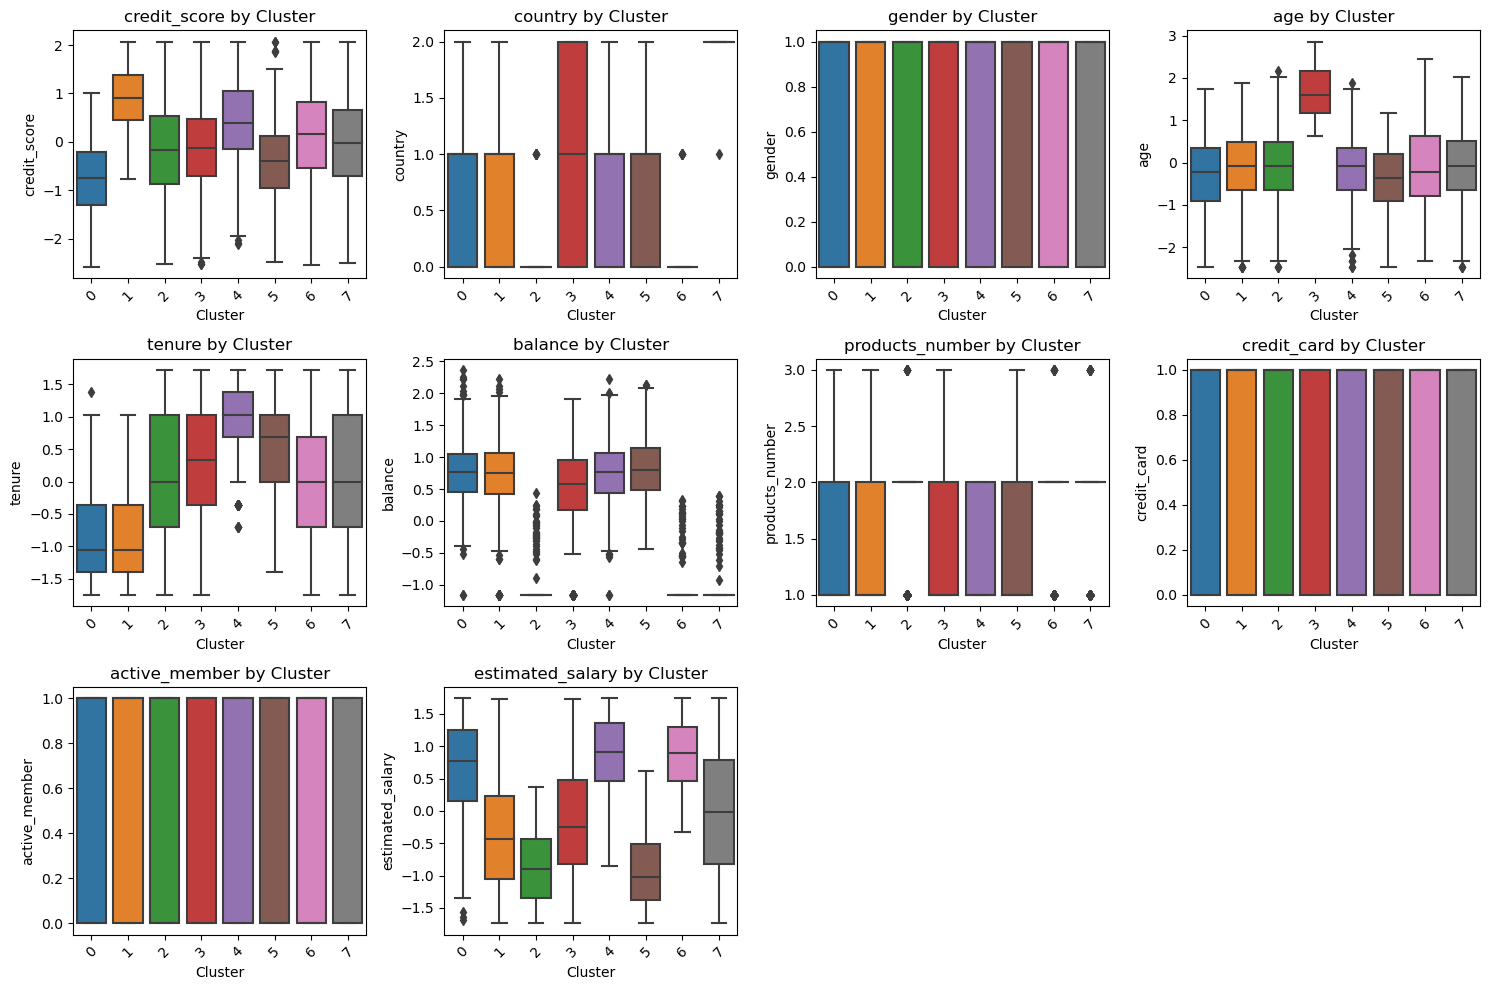

In [238]:
# 2. Box plots untuk melihat distribusi fitur di setiap cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} by Cluster')
    plt.xticks(rotation=45)
plt.tight_layout()

In [239]:
plt.savefig('cluster_boxplots.png')
plt.close()

Text(0.5, 1.0, 'Karakteristik Rata-rata Setiap Cluster')

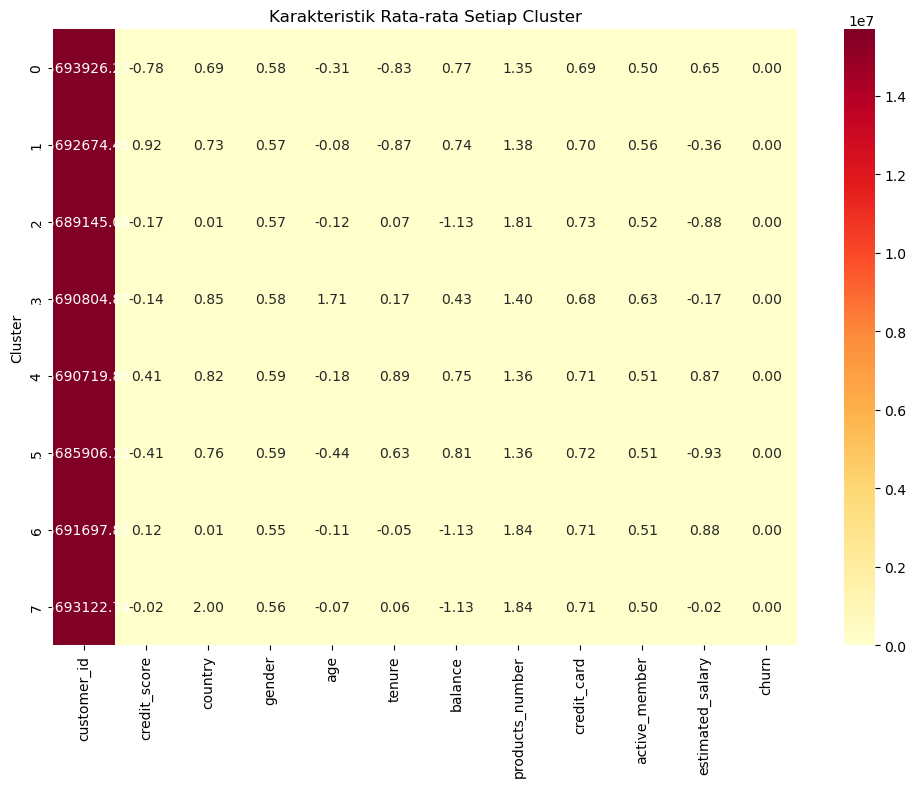

In [240]:
# 3. Heatmap untuk melihat rata-rata nilai fitur di setiap cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_stats, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Karakteristik Rata-rata Setiap Cluster')

In [241]:
plt.savefig('cluster_heatmap.png')
plt.close()

In [242]:
# Menyimpan hasil clustering
df.to_csv('Bank_Customer_Clustering_Results.csv', index=False)
print("\nHasil clustering telah disimpan dalam file 'Bank_Customer_Clustering_Results.csv'")


Hasil clustering telah disimpan dalam file 'Bank_Customer_Clustering_Results.csv'


In [243]:
# Menampilkan ukuran setiap cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nJumlah nasabah dalam setiap cluster:")
for cluster in range(optimal_k):
    print(f"Cluster {cluster}: {cluster_sizes[cluster]} nasabah")

# Analisis churn rate per cluster
churn_by_cluster = df.groupby('Cluster')['churn'].mean() * 100
print("\nChurn rate per cluster:")
for cluster in range(optimal_k):
    print(f"Cluster {cluster}: {churn_by_cluster[cluster]:.2f}%")


Jumlah nasabah dalam setiap cluster:
Cluster 0: 944 nasabah
Cluster 1: 1002 nasabah
Cluster 2: 978 nasabah
Cluster 3: 734 nasabah
Cluster 4: 932 nasabah
Cluster 5: 969 nasabah
Cluster 6: 954 nasabah
Cluster 7: 964 nasabah

Churn rate per cluster:
Cluster 0: 0.00%
Cluster 1: 0.00%
Cluster 2: 0.00%
Cluster 3: 0.00%
Cluster 4: 0.00%
Cluster 5: 0.00%
Cluster 6: 0.00%
Cluster 7: 0.00%


In [244]:
# Membaca dataset
print("Loading dataset...")
df = pd.read_csv('Bank Customer Churn Prediction Pre-Processed.csv')

# Memilih fitur untuk clustering (tanpa customer_id dan churn)
features_original = ['credit_score', 'country', 'gender', 'age', 'tenure', 
                    'balance', 'products_number', 'credit_card', 
                    'active_member', 'estimated_salary']

X_original = df[features_original]

Loading dataset...


In [245]:
# 1. Model Clustering dengan Semua Fitur
print("\n1. Evaluasi Model dengan Semua Fitur")
k = 8
kmeans_original = KMeans(n_clusters=k, random_state=42)
clusters_original = kmeans_original.fit_predict(X_original)
silhouette_original = silhouette_score(X_original, clusters_original)

print(f"Silhouette Score dengan semua fitur: {silhouette_original:.4f}")
print(f"Inertia dengan semua fitur: {kmeans_original.inertia_:.4f}")


1. Evaluasi Model dengan Semua Fitur
Silhouette Score dengan semua fitur: 0.1183
Inertia dengan semua fitur: 30409.6436



2. Melakukan Feature Selection dengan PCA


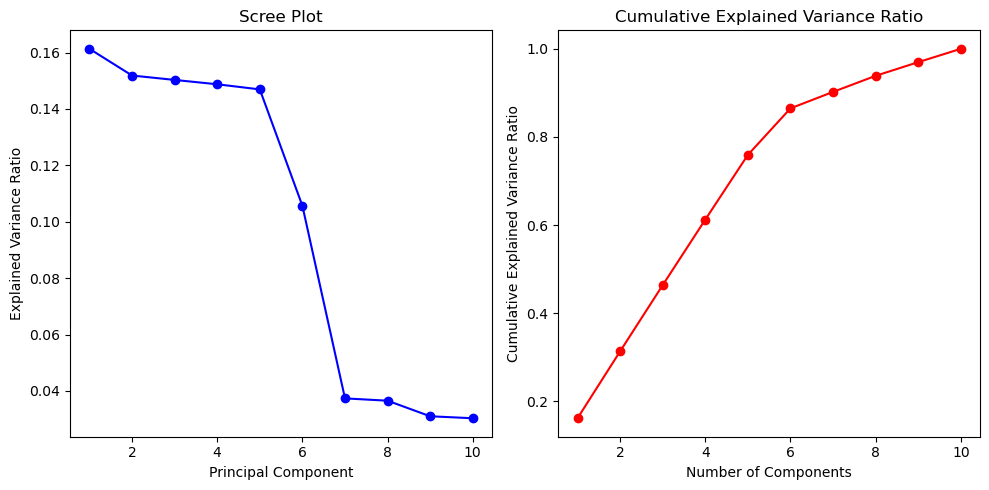

In [246]:
# 2. Feature Selection menggunakan PCA
print("\n2. Melakukan Feature Selection dengan PCA")
pca = PCA()
X_pca = pca.fit_transform(X_original)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.tight_layout()

In [247]:
plt.savefig('pca_analysis.png')
plt.close()

In [248]:
# Memilih jumlah komponen yang menjelaskan 80% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"\nJumlah komponen optimal (80% variance): {n_components}")

# Menggunakan PCA dengan jumlah komponen optimal
pca_optimal = PCA(n_components=n_components)
X_selected = pca_optimal.fit_transform(X_original)


Jumlah komponen optimal (80% variance): 6


In [249]:
# 3. Model Clustering dengan Fitur Terpilih
print("\n3. Evaluasi Model dengan Fitur Terpilih")
kmeans_selected = KMeans(n_clusters=k, random_state=42)
clusters_selected = kmeans_selected.fit_predict(X_selected)
silhouette_selected = silhouette_score(X_selected, clusters_selected)

print(f"Silhouette Score dengan fitur terpilih: {silhouette_selected:.4f}")
print(f"Inertia dengan fitur terpilih: {kmeans_selected.inertia_:.4f}")


3. Evaluasi Model dengan Fitur Terpilih
Silhouette Score dengan fitur terpilih: 0.1444
Inertia dengan fitur terpilih: 23938.6508



4. Analisis Kontribusi Fitur


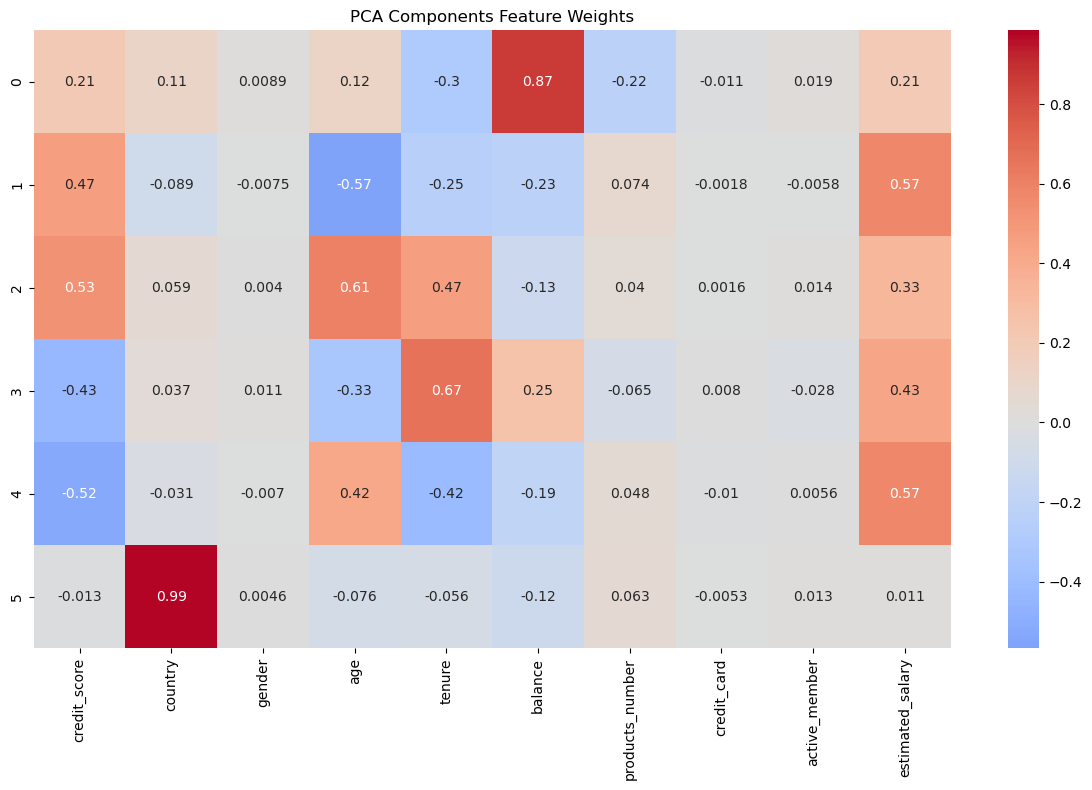

In [250]:
# 4. Analisis Komponen
print("\n4. Analisis Kontribusi Fitur")
components_df = pd.DataFrame(
    pca_optimal.components_,
    columns=features_original
)

plt.figure(figsize=(12, 8))
sns.heatmap(components_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Components Feature Weights')
plt.tight_layout()

In [251]:
plt.savefig('feature_weights.png')
plt.close()

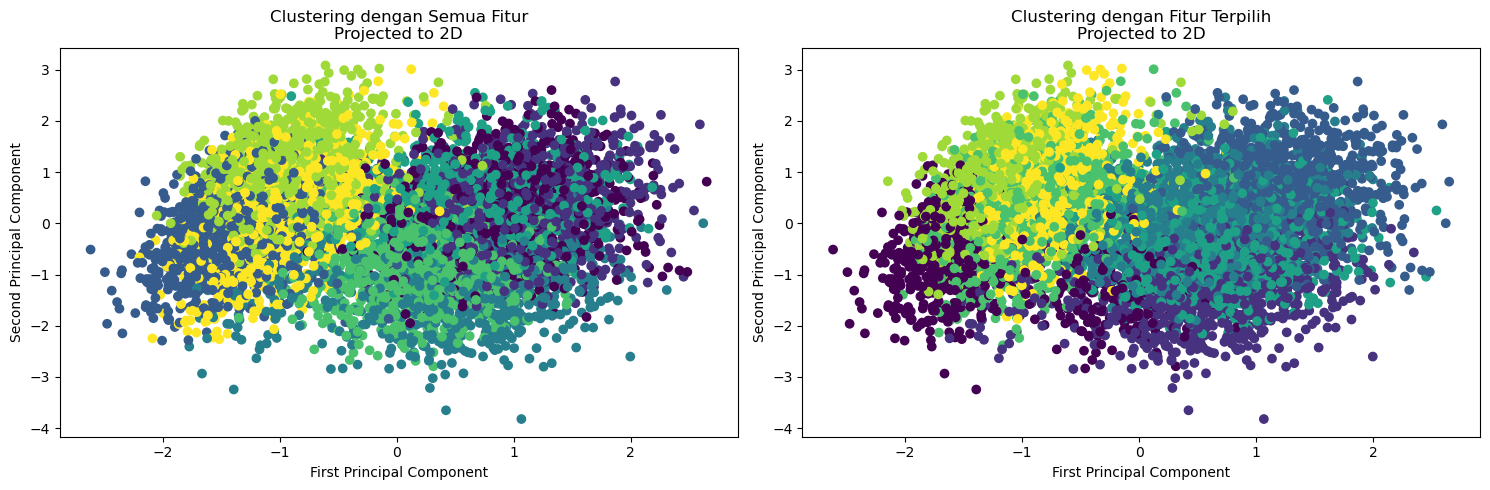

In [252]:
# 5. Visualisasi Perbandingan Clustering
# Untuk model original (menggunakan 2 PC untuk visualisasi)
pca_viz = PCA(n_components=2)
X_viz_original = pca_viz.fit_transform(X_original)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_viz_original[:, 0], X_viz_original[:, 1], c=clusters_original, cmap='viridis')
plt.title('Clustering dengan Semua Fitur\nProjected to 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Untuk model dengan fitur terpilih
X_viz_selected = X_selected[:, :2] if X_selected.shape[1] >= 2 else pca_viz.fit_transform(X_selected)
plt.subplot(1, 2, 2)
plt.scatter(X_viz_selected[:, 0], X_viz_selected[:, 1], c=clusters_selected, cmap='viridis')
plt.title('Clustering dengan Fitur Terpilih\nProjected to 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()

In [253]:
plt.savefig('clustering_comparison.png')
plt.close()

In [254]:
# 6. Perbandingan Hasil
print("\n5. Perbandingan Hasil Clustering")
print("\nModel dengan Semua Fitur:")
print(f"- Silhouette Score: {silhouette_original:.4f}")
print(f"- Jumlah fitur: {len(features_original)}")

print("\nModel dengan Fitur Terpilih (PCA):")
print(f"- Silhouette Score: {silhouette_selected:.4f}")
print(f"- Jumlah komponen: {n_components}")
print(f"- Variance explained: {cumulative_variance_ratio[n_components-1]:.4f}")

# Menyimpan hasil clustering
df['Cluster_Original'] = clusters_original
df['Cluster_Selected'] = clusters_selected
df.to_csv('Clustering_Results_Comparison.csv', index=False)
print("\nHasil perbandingan telah disimpan dalam 'Clustering_Results_Comparison.csv'")


5. Perbandingan Hasil Clustering

Model dengan Semua Fitur:
- Silhouette Score: 0.1183
- Jumlah fitur: 10

Model dengan Fitur Terpilih (PCA):
- Silhouette Score: 0.1444
- Jumlah komponen: 6
- Variance explained: 0.8648

Hasil perbandingan telah disimpan dalam 'Clustering_Results_Comparison.csv'


In [255]:
# Membaca dataset dengan hasil clustering
print("Loading dataset...")
df = pd.read_csv('Clustering_Results_Comparison.csv')

# Memilih fitur untuk visualisasi
features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
X = df[features]
clusters = df['Cluster_Selected']  # Menggunakan hasil clustering dari feature selection

# 1. PCA untuk visualisasi 2D dan 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

Loading dataset...


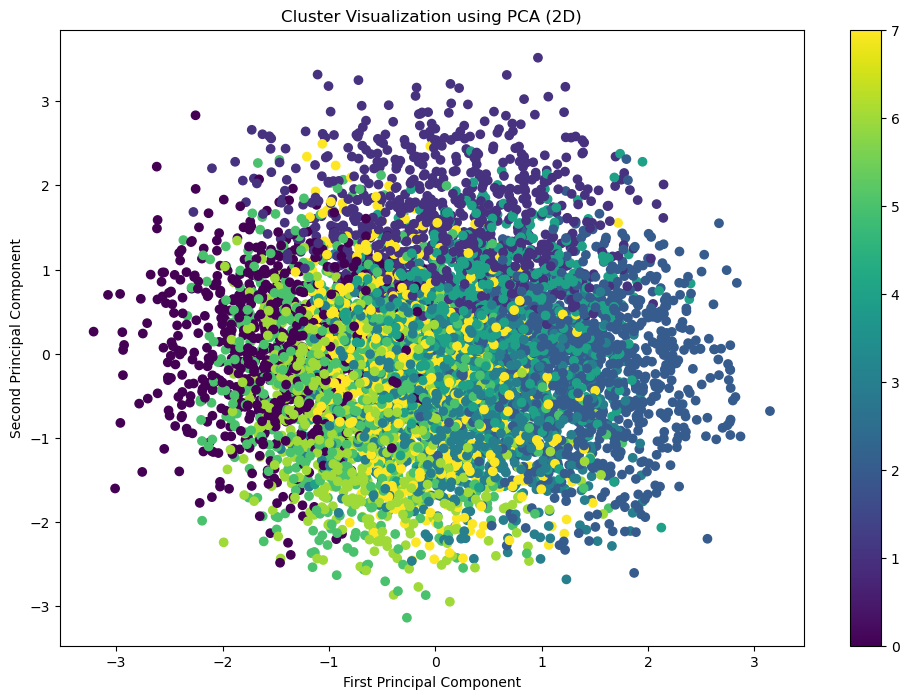

In [256]:
# 2D PCA Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization using PCA (2D)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)

In [257]:
plt.savefig('cluster_pca_2d.png')
plt.close()

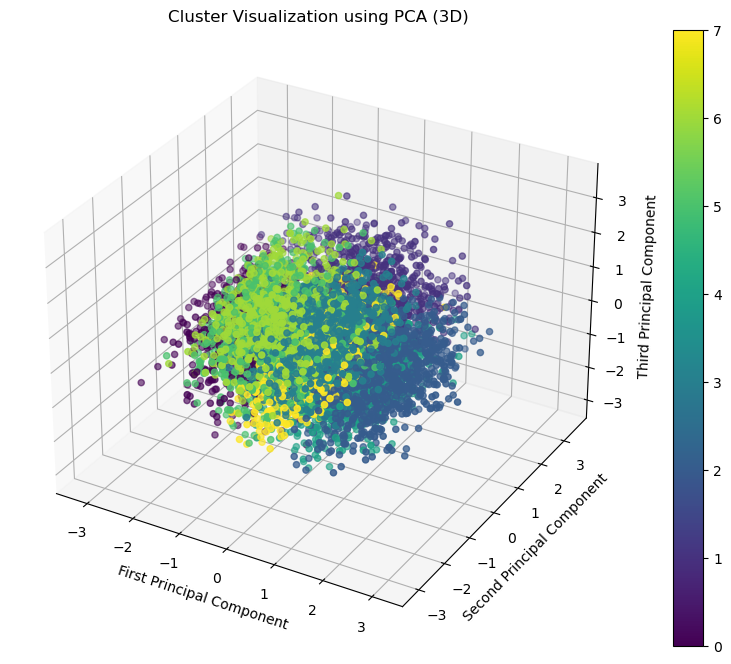

In [258]:
# 3D PCA Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                    c=clusters, cmap='viridis')
ax.set_title('Cluster Visualization using PCA (3D)')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.colorbar(scatter)

In [259]:
plt.savefig('cluster_pca_3d.png')
plt.close()

<Figure size 1500x1500 with 0 Axes>

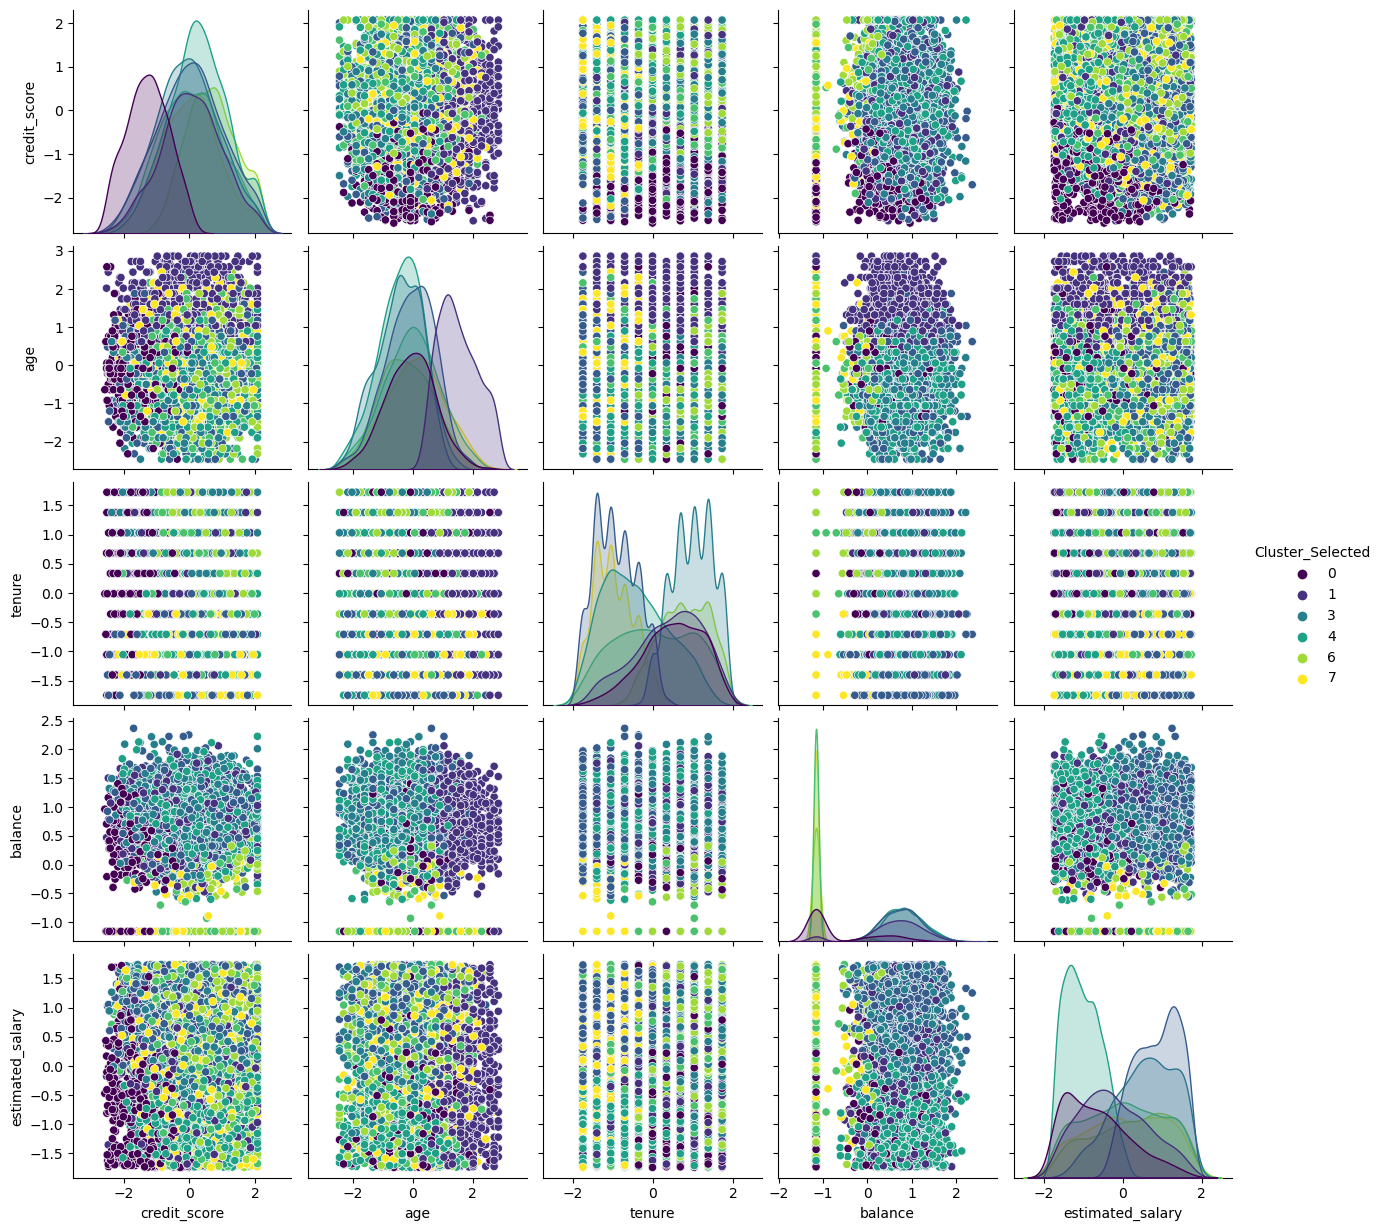

In [260]:
# Visualisasi pair plot untuk fitur penting
plt.figure(figsize=(15, 15))
sns.pairplot(data=df, vars=features, hue='Cluster_Selected', palette='viridis')

In [261]:
plt.savefig('cluster_pairplot.png')
plt.close()

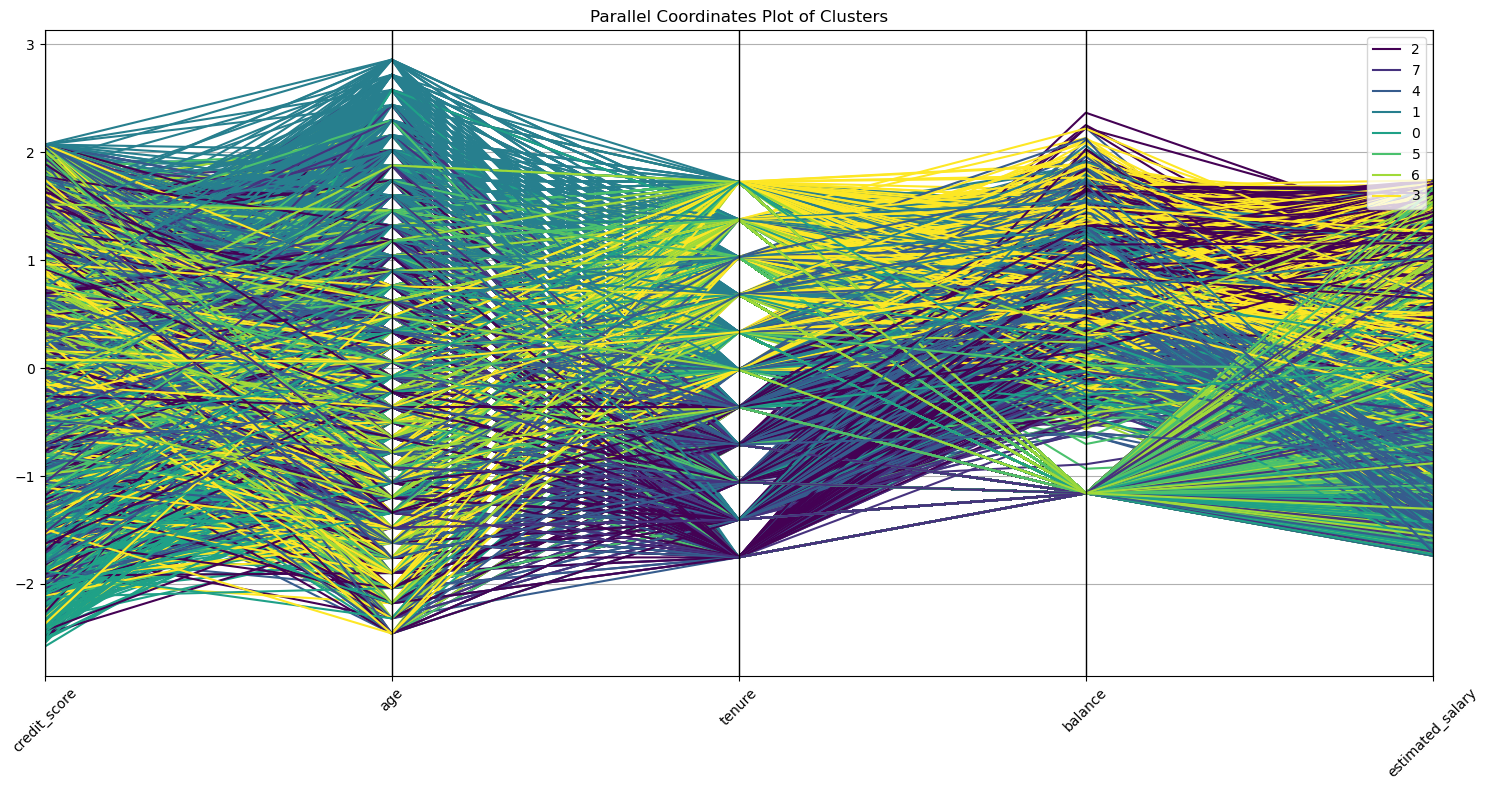

In [262]:
# Parallel Coordinates Plot
plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(
    df[features + ['Cluster_Selected']], 
    'Cluster_Selected',
    colormap=plt.cm.viridis
)
plt.title('Parallel Coordinates Plot of Clusters')
plt.xticks(rotation=45)
plt.tight_layout()

In [263]:
plt.savefig('cluster_parallel_coordinates.png')
plt.close()

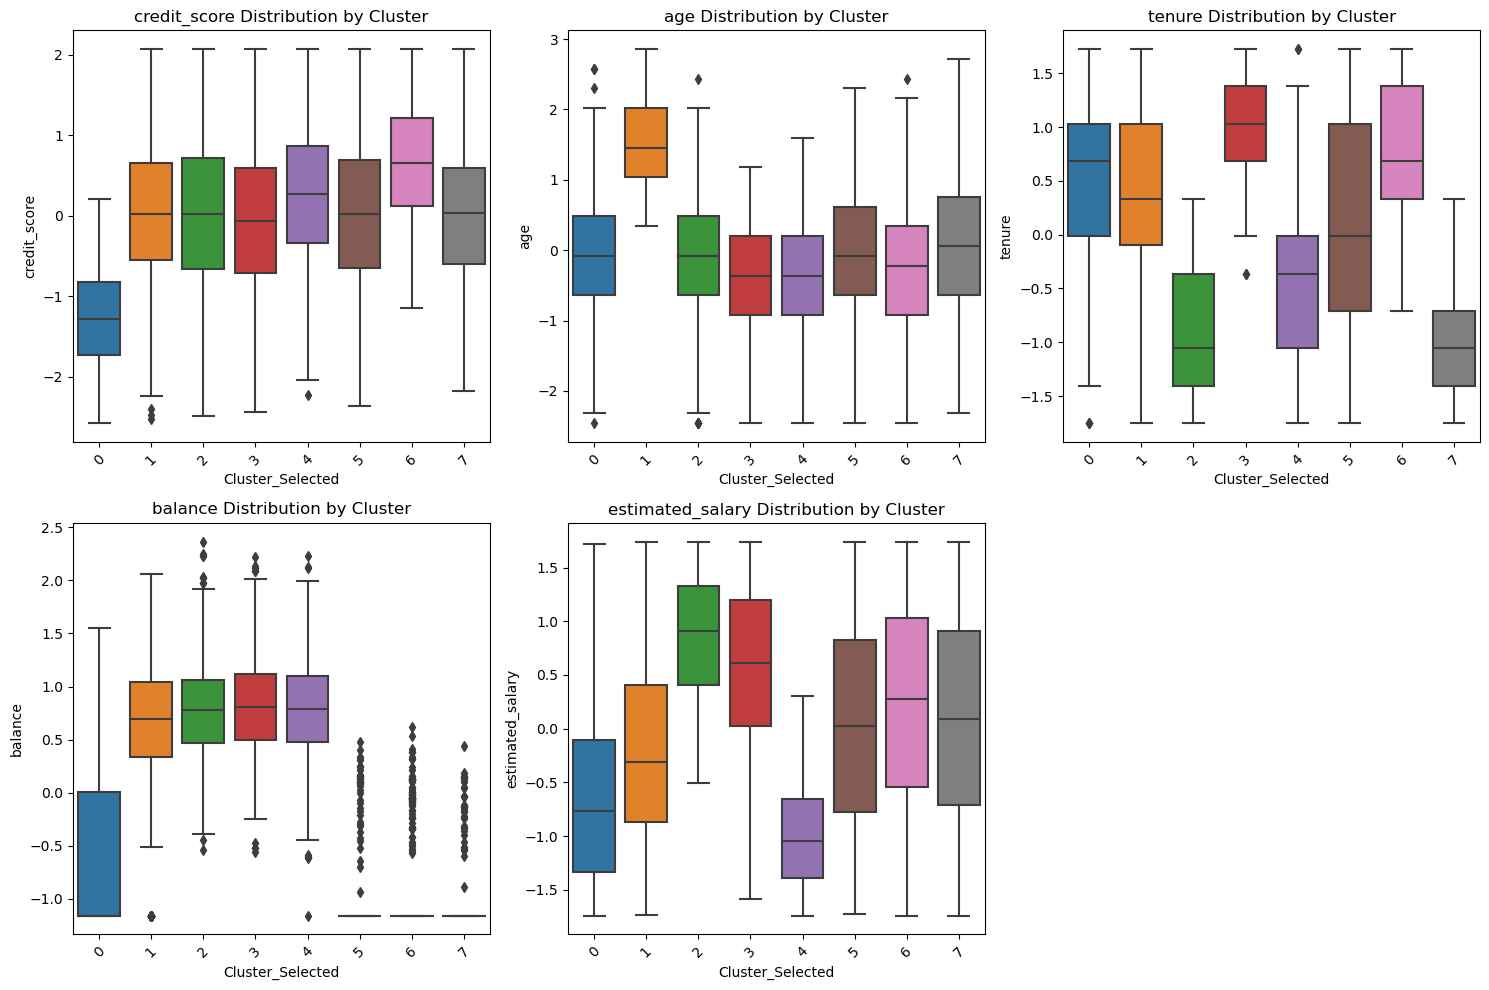

In [264]:
# Radar Chart (Spider Plot) untuk centroid clusters
# Normalisasi data untuk radar chart
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df['Cluster'] = clusters

# Menghitung rata-rata setiap feature untuk setiap cluster
cluster_means = X_scaled_df.groupby('Cluster')[features].mean()

# Membuat radar chart
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].values
    values = np.concatenate((values, [values[0]]))  # complete the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_title('Cluster Characteristics Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('cluster_radar_chart.png')
plt.close()

# Boxplot untuk setiap feature berdasarkan cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster_Selected', y=feature, data=df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xticks(rotation=45)
plt.tight_layout()

In [265]:
plt.savefig('cluster_boxplots.png')
plt.close()

Text(0.5, 1.0, 'Average Characteristics of Each Cluster')

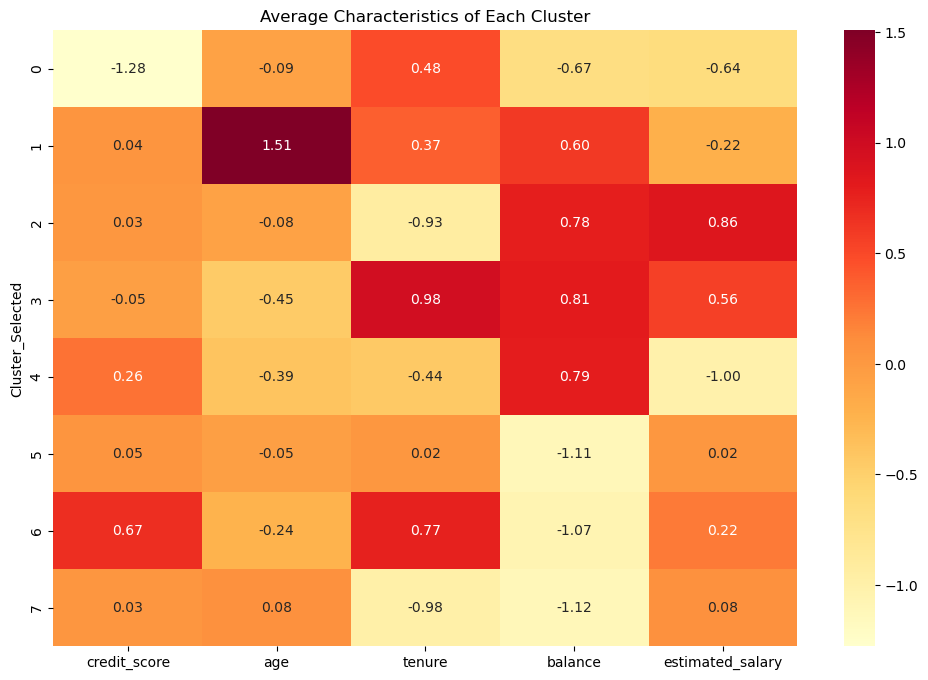

In [266]:
# Heatmap karakteristik cluster
cluster_means = df.groupby('Cluster_Selected')[features].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Characteristics of Each Cluster')

In [267]:
plt.savefig('cluster_heatmap.png')
plt.close()

In [268]:
# Mencetak ringkasan statistik untuk setiap cluster
print("\nRingkasan Statistik per Cluster:")
for cluster in sorted(df['Cluster_Selected'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster_Selected'] == cluster][features].describe())

# Mencetak jumlah anggota setiap cluster
cluster_sizes = df['Cluster_Selected'].value_counts().sort_index()
print("\nJumlah anggota setiap cluster:")
for cluster in range(len(cluster_sizes)):
    print(f"Cluster {cluster}: {cluster_sizes[cluster]} nasabah")


Ringkasan Statistik per Cluster:

Cluster 0:
       credit_score         age      tenure     balance  estimated_salary
count    712.000000  712.000000  712.000000  712.000000        712.000000
mean      -1.276230   -0.085779    0.475972   -0.667090         -0.637196
std        0.632567    0.828204    0.754700    0.774047          0.827763
min       -2.580473   -2.458809   -1.752222   -1.159667         -1.739118
25%       -1.733620   -0.639931   -0.013811   -1.159667         -1.328284
50%       -1.278829   -0.080277    0.681554   -1.159667         -0.768922
75%       -0.821423    0.479378    1.029236    0.004915         -0.100537
max        0.211005    2.578083    1.724601    1.547199          1.721038

Cluster 1:
       credit_score         age      tenure     balance  estimated_salary
count    856.000000  856.000000  856.000000  856.000000        856.000000
mean       0.041185    1.508626    0.371239    0.598702         -0.218554
std        0.919189    0.655246    0.840625    0.66877